# **Clean Air Scale : Ranking Air Quality according to level of concern**

This project aims at ranking the location based on its air quality with use of Machine Learning and Deep Learning techniques. The measures of air quality are different meteorological factors like temperature, humidity, etc.

The data has shape of 9,82,170 rows and 38 columns. The data is collected at various locations in Pune city from Jan 2021 to Jan 2022 by Pune Smart City Development Corporation Limited.

Below I have provided a table describing the air quality based on the levels of concern and Air Quality Index range.





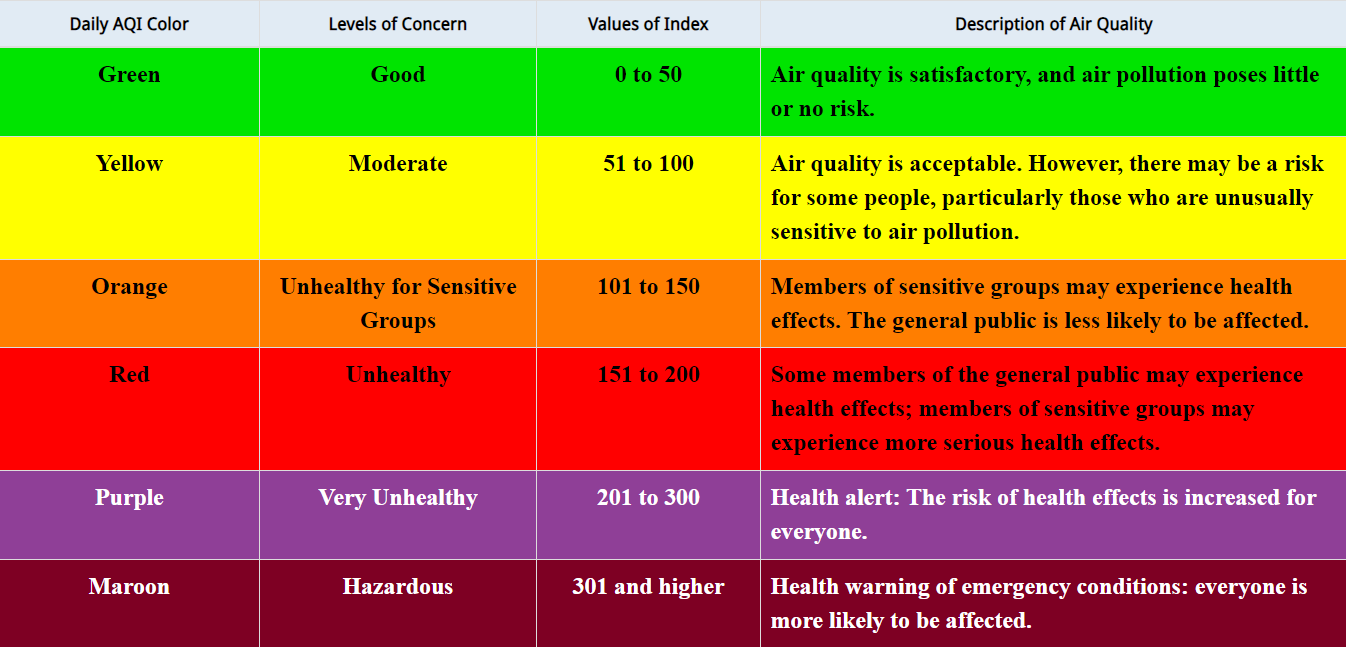

The level of concern of air quality is represented by column "Air Quality Rank" which has interger values ranging from 0 to 5 and its encoding is as follows,

Air Quality Rank--------->Level of Concern

*     5          --------> Good
*     4 --------> Moderate

*     3 --------> Unhealthy for sensitive group

*     2 --------> Unhealthy
*     1 --------> Very Unhealthy


*     0 --------> Hazardous







In [30]:
import pandas as pd #importing Pandas Library

###Loading the dataset


In [2]:
data=pd.read_csv("/content/drive/MyDrive/CleanAirScale: Rating Locations on Air Quality/AQI_Rank_Data.csv")

<ipython-input-2-aa03272d0eb2>:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("/content/drive/MyDrive/CleanAirScale: Rating Locations on Air Quality/AQI_Rank_Data.csv")


###Exploratory Data Analysis


In [3]:
data.dtypes

OBJECTID                int64
LASTUPDATEDATETIME     object
STARTDATETIME          object
ENDDATETIME            object
DATASOURCEID            int64
NAME                   object
LOCATION               object
AQI_POLLUTANT          object
CATEGORY               object
DEVICEID               object
HUMIDITY              float64
LIGHT                  object
NO_MAX                float64
NO_MIN                float64
NO2_MAX               float64
NO2_MIN               float64
OZONE_MAX             float64
OZONE_MIN             float64
PM10_MAX              float64
PM10_MIN              float64
PM2_MAX               float64
PM2_MIN               float64
SO2_MAX               float64
SO2_MIN               float64
STATUS                 object
CO_MAX                float64
CO_MIN                float64
CO2_MAX               float64
CO2_MIN               float64
SOUND                 float64
TEMPRATURE_MAX        float64
TEMPRATURE_MIN        float64
UV_MAX                float64
UV_MIN    

In [4]:
data.ENDDATETIME.tail()

982165    2021-12-31 23:45:51
982166    2021-12-31 23:45:51
982167    2021-12-31 23:45:51
982168    2021-12-31 23:45:51
982169    2021-12-31 23:45:51
Name: ENDDATETIME, dtype: object

###Converting timestamp data into numeric feautures

In [5]:
import datetime
data["date_time"]=pd.to_datetime(data["ENDDATETIME"], format="%Y-%m-%d %H:%M:%S")
data["Hour_of_Day"]=data["date_time"].dt.hour

In [6]:
data.columns

Index(['OBJECTID', 'LASTUPDATEDATETIME', 'STARTDATETIME', 'ENDDATETIME',
       'DATASOURCEID', 'NAME', 'LOCATION', 'AQI_POLLUTANT', 'CATEGORY',
       'DEVICEID', 'HUMIDITY', 'LIGHT', 'NO_MAX', 'NO_MIN', 'NO2_MAX',
       'NO2_MIN', 'OZONE_MAX', 'OZONE_MIN', 'PM10_MAX', 'PM10_MIN', 'PM2_MAX',
       'PM2_MIN', 'SO2_MAX', 'SO2_MIN', 'STATUS', 'CO_MAX', 'CO_MIN',
       'CO2_MAX', 'CO2_MIN', 'SOUND', 'TEMPRATURE_MAX', 'TEMPRATURE_MIN',
       'UV_MAX', 'UV_MIN', 'AIR_PRESSURE', 'Air_Quality_Rank', 'date_time',
       'Hour_of_Day'],
      dtype='object')

In [7]:
data.shape

(982170, 38)

###Removing unnecessary columns



In [8]:
data=data.drop(data.columns[[0,1,2,3,4,5,6,8,9,36]],axis=1)
data=data.drop(["STATUS"],axis=1)

In [9]:
data.dtypes

AQI_POLLUTANT        object
HUMIDITY            float64
LIGHT                object
NO_MAX              float64
NO_MIN              float64
NO2_MAX             float64
NO2_MIN             float64
OZONE_MAX           float64
OZONE_MIN           float64
PM10_MAX            float64
PM10_MIN            float64
PM2_MAX             float64
PM2_MIN             float64
SO2_MAX             float64
SO2_MIN             float64
CO_MAX              float64
CO_MIN              float64
CO2_MAX             float64
CO2_MIN             float64
SOUND               float64
TEMPRATURE_MAX      float64
TEMPRATURE_MIN      float64
UV_MAX              float64
UV_MIN              float64
AIR_PRESSURE        float64
Air_Quality_Rank      int64
Hour_of_Day           int64
dtype: object

###Changing the datatype of 'LIGHT' column from object to numeric by coercing the errors

In [10]:
data.LIGHT.isna().sum()

61477

In [11]:
Light_num=pd.to_numeric(data["LIGHT"], errors='coerce')

###The "LIGHT" column has 61477 null values but after changing the datatype number of null values become 85301. For sorting this issue, find the unique values of column "LIGHT" which were coerced due to error. The unique values are nan and '[ ]'. The count of "[ ]" values is 23824 which when added to null values count gives 85301.

In [12]:
data["LIGHT"][Light_num.isna()].unique()

array(['[]', nan], dtype=object)

In [13]:
data.loc[data["LIGHT"]=="[]","LIGHT"].value_counts()

[]    23824
Name: LIGHT, dtype: int64

In [14]:
data["LIGHT"]=Light_num

In [15]:
data["LIGHT"].isna().sum()

85301

In [16]:
data.dtypes

AQI_POLLUTANT        object
HUMIDITY            float64
LIGHT               float64
NO_MAX              float64
NO_MIN              float64
NO2_MAX             float64
NO2_MIN             float64
OZONE_MAX           float64
OZONE_MIN           float64
PM10_MAX            float64
PM10_MIN            float64
PM2_MAX             float64
PM2_MIN             float64
SO2_MAX             float64
SO2_MIN             float64
CO_MAX              float64
CO_MIN              float64
CO2_MAX             float64
CO2_MIN             float64
SOUND               float64
TEMPRATURE_MAX      float64
TEMPRATURE_MIN      float64
UV_MAX              float64
UV_MIN              float64
AIR_PRESSURE        float64
Air_Quality_Rank      int64
Hour_of_Day           int64
dtype: object

###Converting Categorical data into numeric data by using one hot encoding


In [17]:
AQI_POLLUTANT_dummies=pd.get_dummies(data["AQI_POLLUTANT"])

In [18]:
data.shape

(982170, 27)

In [19]:
data=pd.concat([data,AQI_POLLUTANT_dummies],axis=1)

In [20]:
data.shape,data.dtypes

((982170, 33),
 AQI_POLLUTANT        object
 HUMIDITY            float64
 LIGHT               float64
 NO_MAX              float64
 NO_MIN              float64
 NO2_MAX             float64
 NO2_MIN             float64
 OZONE_MAX           float64
 OZONE_MIN           float64
 PM10_MAX            float64
 PM10_MIN            float64
 PM2_MAX             float64
 PM2_MIN             float64
 SO2_MAX             float64
 SO2_MIN             float64
 CO_MAX              float64
 CO_MIN              float64
 CO2_MAX             float64
 CO2_MIN             float64
 SOUND               float64
 TEMPRATURE_MAX      float64
 TEMPRATURE_MIN      float64
 UV_MAX              float64
 UV_MIN              float64
 AIR_PRESSURE        float64
 Air_Quality_Rank      int64
 Hour_of_Day           int64
 CO                    uint8
 NO2                   uint8
 O3                    uint8
 PM10                  uint8
 PM2.5                 uint8
 SO2                   uint8
 dtype: object)

In [21]:
data=data.drop(["AQI_POLLUTANT"],axis=1)

In [22]:
data.dtypes,data.shape

(HUMIDITY            float64
 LIGHT               float64
 NO_MAX              float64
 NO_MIN              float64
 NO2_MAX             float64
 NO2_MIN             float64
 OZONE_MAX           float64
 OZONE_MIN           float64
 PM10_MAX            float64
 PM10_MIN            float64
 PM2_MAX             float64
 PM2_MIN             float64
 SO2_MAX             float64
 SO2_MIN             float64
 CO_MAX              float64
 CO_MIN              float64
 CO2_MAX             float64
 CO2_MIN             float64
 SOUND               float64
 TEMPRATURE_MAX      float64
 TEMPRATURE_MIN      float64
 UV_MAX              float64
 UV_MIN              float64
 AIR_PRESSURE        float64
 Air_Quality_Rank      int64
 Hour_of_Day           int64
 CO                    uint8
 NO2                   uint8
 O3                    uint8
 PM10                  uint8
 PM2.5                 uint8
 SO2                   uint8
 dtype: object,
 (982170, 32))

In [23]:
data.isna().sum()

HUMIDITY            62083
LIGHT               85301
NO_MAX                  0
NO_MIN                  0
NO2_MAX             16686
NO2_MIN             16686
OZONE_MAX           12708
OZONE_MIN           12708
PM10_MAX            15887
PM10_MIN            15887
PM2_MAX             15937
PM2_MIN             15937
SO2_MAX             11974
SO2_MIN             11974
CO_MAX              11761
CO_MIN              11761
CO2_MAX             13945
CO2_MIN             13945
SOUND               60231
TEMPRATURE_MAX      43070
TEMPRATURE_MIN      43070
UV_MAX              29204
UV_MIN              29204
AIR_PRESSURE        60213
Air_Quality_Rank        0
Hour_of_Day             0
CO                      0
NO2                     0
O3                      0
PM10                    0
PM2.5                   0
SO2                     0
dtype: int64

In [24]:
data.dropna(inplace=True)

###Droping all the samples with null values in it.

In [25]:
data.shape

(865822, 32)

###Splitting train and test dataset and feature scaling

In [26]:
x=data.drop(["Air_Quality_Rank"],axis=1)
y=data["Air_Quality_Rank"]
x.shape,y.shape

from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y=tts(x,y,random_state=4)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

train_x_scaled=scaler.fit_transform(train_x)
test_x_scaled=scaler.fit_transform(test_x)

###Implementation of K Nearest Neighbors Algorithm

In [28]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [29]:
model = KNN(n_neighbors = 8)
model.fit(train_x_scaled, train_y)
predictions = model.predict(test_x_scaled)

In [32]:
score=f1_score(predictions,test_y,average="micro")
print("F1 score for KNN algorithm is ",score)

F1 score for KNN algorithm is  0.9448617732934176


###Implementation of Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=5)

model.fit(train_x, train_y)

In [ ]:
print(model.score(train_x, train_y))
print(model.score(test_x, test_y))

0.9999491812013565
0.9676100454595853


###Implementation of Gaussian Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model= GaussianNB()
model.fit(train_x,train_y)


In [ ]:
pred=model.predict(test_x)
accuracy_score(test_y,pred)

0.6432900912887608

###Implementation of Neural Network

In [70]:
train_y_NN=pd.get_dummies(train_y)
test_y_NN=pd.get_dummies(test_y)

In [34]:
from keras.layers import Dense, InputLayer
from keras.models import Sequential

In [38]:
model=Sequential()

model.add(InputLayer(input_shape=(train_x.shape[1],)))
model.add(Dense(units=100, activation="relu"))
model.add(Dense(units=100, activation="relu"))
model.add(Dense(units=100, activation="relu"))
model.add(Dense(units=100, activation="relu"))
model.add(Dense(units=100, activation="relu"))
model.add(Dense(units=6, activation="softmax"))

In [39]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [40]:
model.fit(train_x, train_y_NN, epochs=50)

Epoch 1/50
20293/20293 [==============================] - 55s 3ms/step - loss: 0.7380 - accuracy: 0.7256
Epoch 2/50
20293/20293 [==============================] - 51s 3ms/step - loss: 0.5044 - accuracy: 0.7881
Epoch 3/50
20293/20293 [==============================] - 49s 2ms/step - loss: 0.4775 - accuracy: 0.7991
Epoch 4/50
20293/20293 [==============================] - 51s 3ms/step - loss: 0.4633 - accuracy: 0.8050
Epoch 5/50
20293/20293 [==============================] - 51s 3ms/step - loss: 0.4539 - accuracy: 0.8089
Epoch 6/50
20293/20293 [==============================] - 49s 2ms/step - loss: 0.4455 - accuracy: 0.8128
Epoch 7/50
20293/20293 [==============================] - 50s 2ms/step - loss: 0.4399 - accuracy: 0.8158
Epoch 8/50
20293/20293 [==============================] - 49s 2ms/step - loss: 0.4327 - accuracy: 0.8190
Epoch 9/50
20293/20293 [==============================] - 49s 2ms/step - loss: 0.4324 - accuracy: 0.8188
Epoch 10/50
20293/20293 [==============================

In [64]:
from sklearn.metrics import accuracy_score
predictions=model.predict(test_x)

6765/6765 [==============================] - 17s 3ms/step


In [72]:
predictions=pd.DataFrame(predictions, columns=[0,1,2,3,4,5])

In [75]:
def air_q(x):
  if x<=0.5 :
    return 0
  else :
    return 1

In [83]:
predictions[0]=predictions[0].apply(lambda x : air_q(x) )
predictions[1]=predictions[1].apply(lambda x : air_q(x) )
predictions[2]=predictions[2].apply(lambda x : air_q(x) )
predictions[3]=predictions[3].apply(lambda x : air_q(x) )
predictions[4]=predictions[4].apply(lambda x : air_q(x) )
predictions[5]=predictions[5].apply(lambda x : air_q(x) )

In [92]:
acc=[]

for i in range(test_y_NN.shape[1]) :
  accr=accuracy_score(test_y_NN[i], predictions[i])
  acc.append(accr)

Avg_acc_score= sum(acc)/ len(acc)
print("Accuracy score on test dataset is ", Avg_acc_score.round(2))


Accuracy score on test dataset is  0.94
